In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_csv('../../data/county_level/full_df.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,...,Drug overdose deaths - modeled raw value,Insufficient sleep raw value,Insufficient sleep CI low,Insufficient sleep CI high,Residential segregation - black/white raw value,Residential segregation - non-white/white raw value,Deaths,Population,Average Temperature,Average Precipitation
0,0,0,1,1,1001,AL,Autauga County,2010,1.0,9778.1,...,NaN,NaN,NaN,NaN,NaN,NaN,12,54571,63.000000,3.416667
1,1,1,1,3,1003,AL,Baldwin County,2010,1.0,8221.7,...,NaN,NaN,NaN,NaN,NaN,NaN,31,182265,65.666667,4.416667
2,2,2,1,9,1009,AL,Blount County,2010,1.0,8929.7,...,NaN,NaN,NaN,NaN,NaN,NaN,11,57322,60.416667,3.833333
3,3,3,1,15,1015,AL,Calhoun County,2010,1.0,11526.2,...,NaN,NaN,NaN,NaN,NaN,NaN,13,118572,60.500000,3.333333
4,4,4,1,31,1031,AL,Coffee County,2010,1.0,9004.7,...,NaN,NaN,NaN,NaN,NaN,NaN,14,49948,63.916667,3.083333


In [12]:
identifying_fields = ['State Abbreviation', 'Name', 'Release Year']
independent_fields = ['Unemployment raw value', 'Income inequality raw value', 'Median household income raw value', 'High school graduation raw value', 'Some college raw value']
dependent_fields = ['Poor mental health days raw value', 'Deaths']
filtered_df = df[identifying_fields + independent_fields + dependent_fields]
filtered_df.head(n=20)

,State Abbreviation,Name,Release Year,Unemployment raw value,Income inequality raw value,Median household income raw value,High school graduation raw value,Some college raw value,Poor mental health days raw value,Deaths
0,AL,Autauga County,2010,0.046,40.7,NaN,0.715190,NaN,4.14,12
1,AL,Baldwin County,2010,0.041,44.5,NaN,0.670437,NaN,4.06,31
2,AL,Blount County,2010,0.041,41.1,NaN,0.730135,NaN,4.47,11
3,AL,Calhoun County,2010,0.051,45.5,NaN,0.649849,NaN,4.84,13
4,AL,Coffee County,2010,0.043,44.7,NaN,0.783520,NaN,4.26,14
5,AL,Colbert County,2010,0.058,43.5,NaN,0.684751,NaN,4.70,10
6,AL,Cullman County,2010,0.043,45.6,NaN,0.739267,NaN,5.29,10
7,AL,Dale County,2010,0.048,41.4,NaN,0.641390,NaN,3.73,10
8,AL,DeKalb County,2010,0.052,45.8,NaN,0.616322,NaN,4.90,12
9,AL,Elmore County,2010,0.046,40.3,NaN,0.630074,NaN,3.15,12


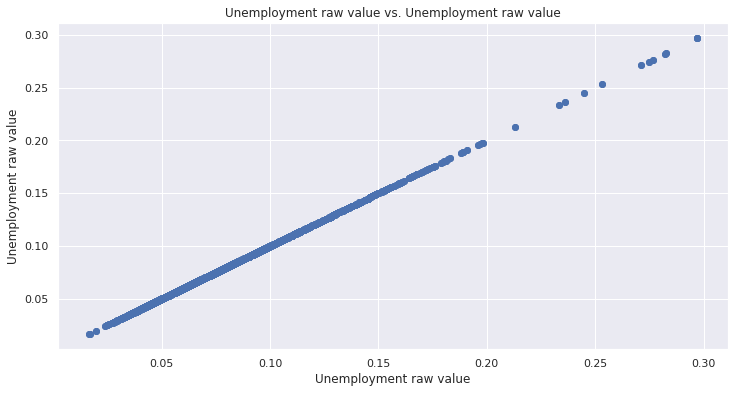

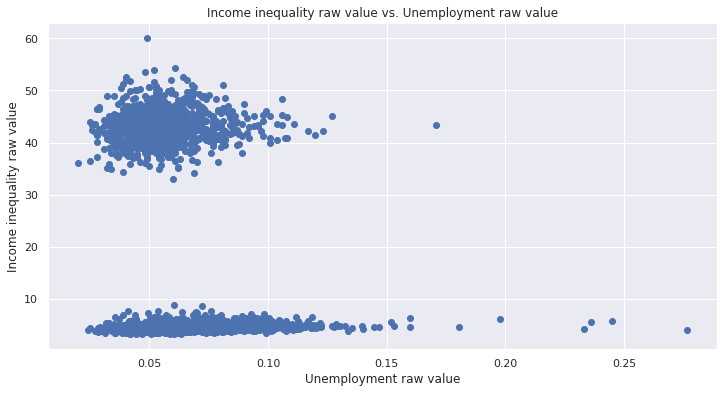

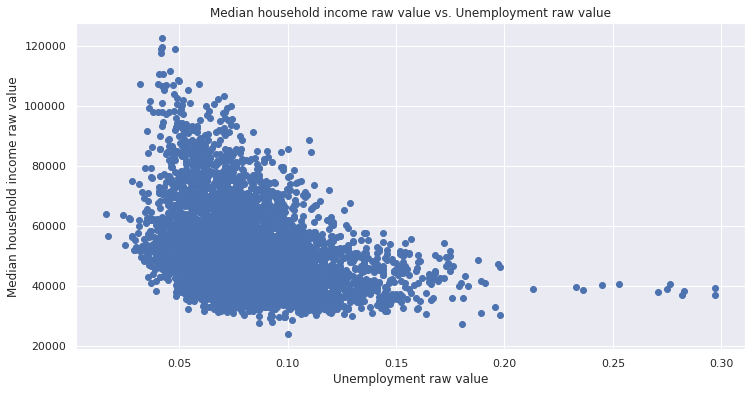

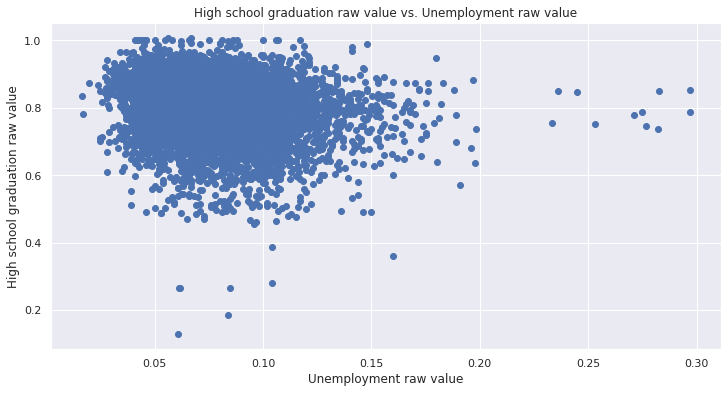

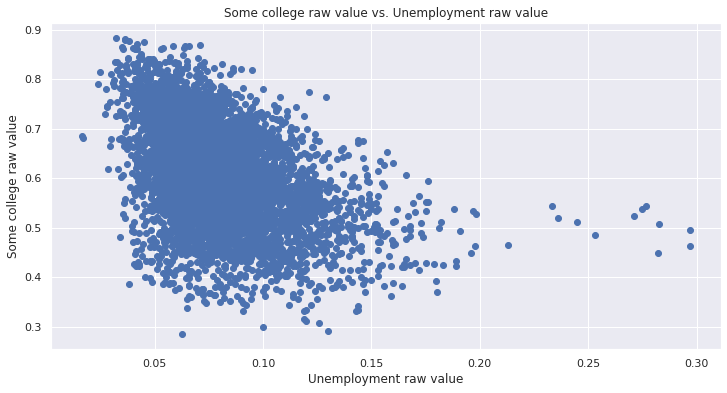

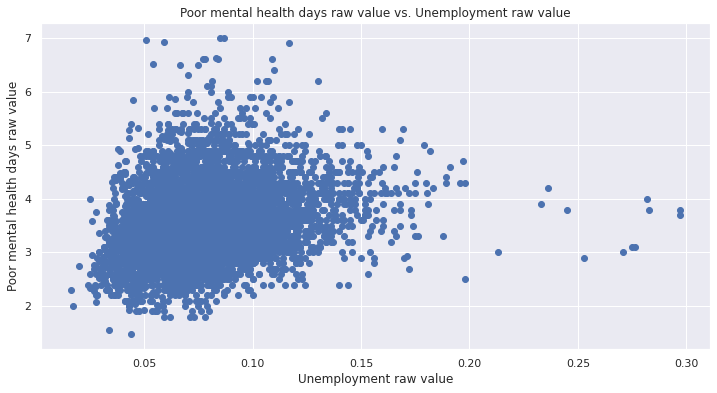

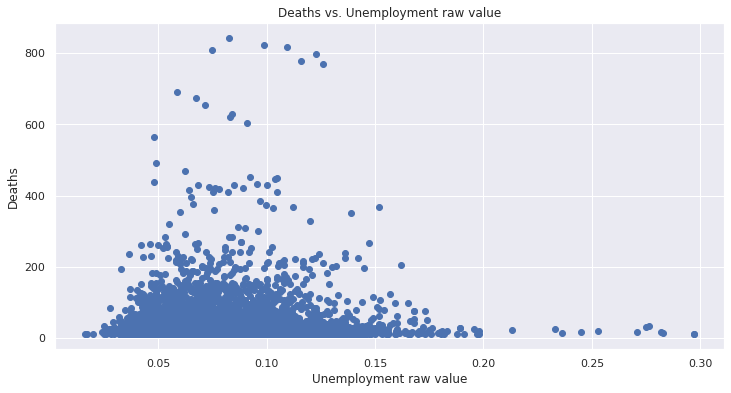

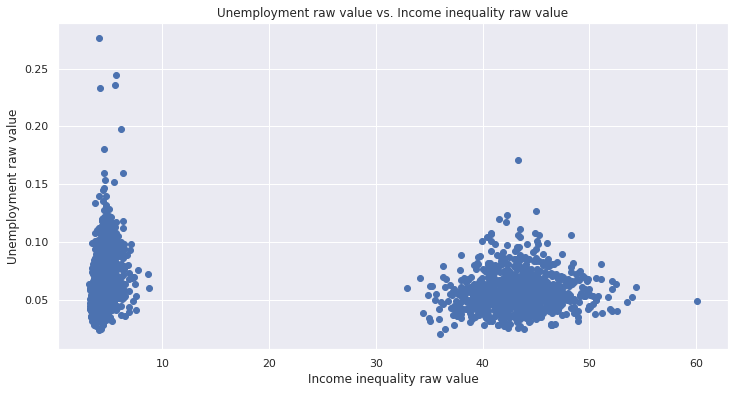

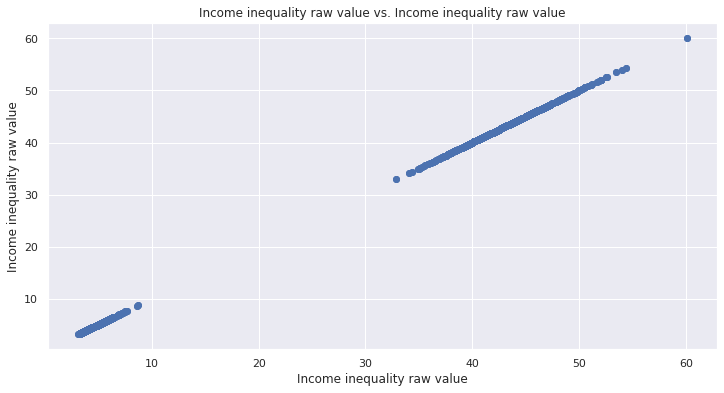

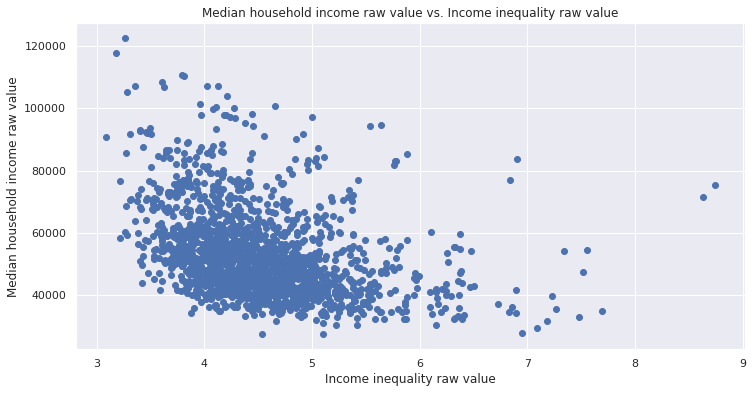

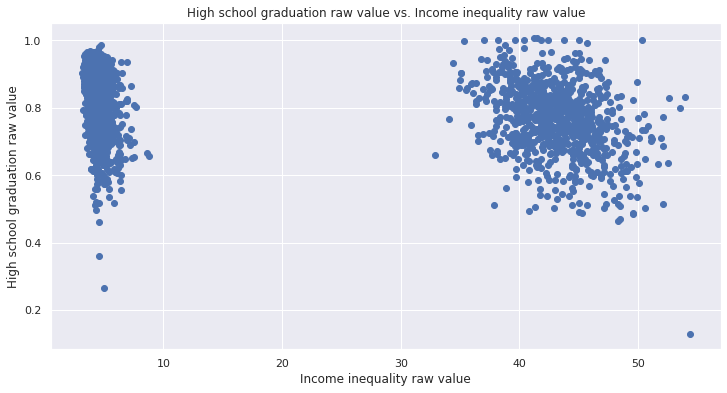

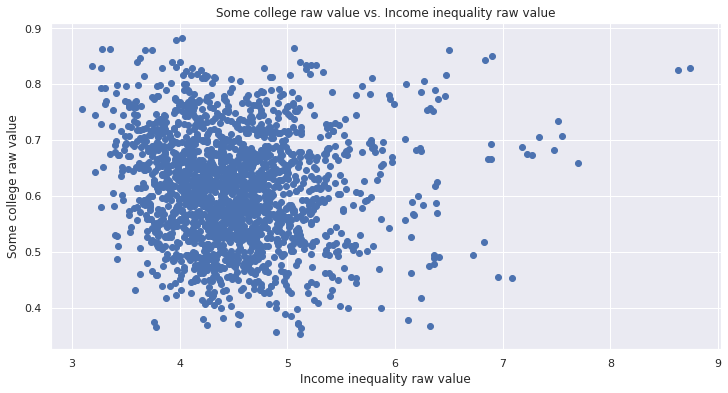

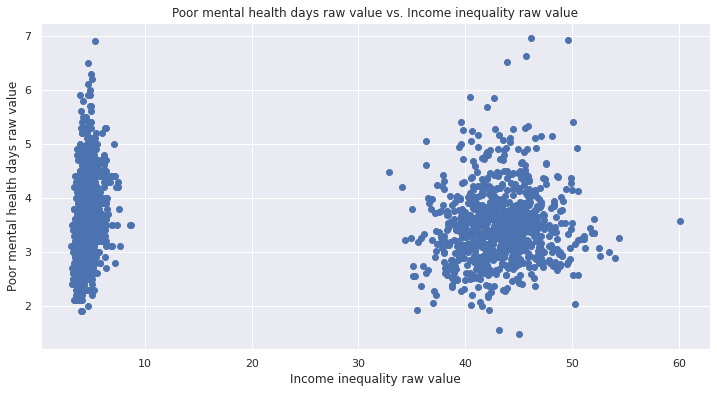

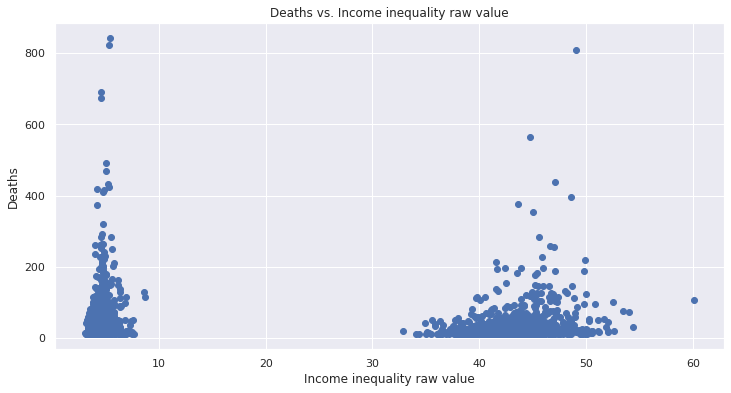

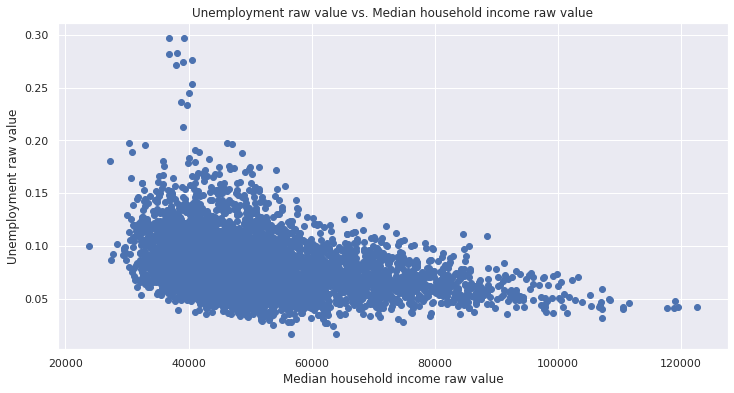

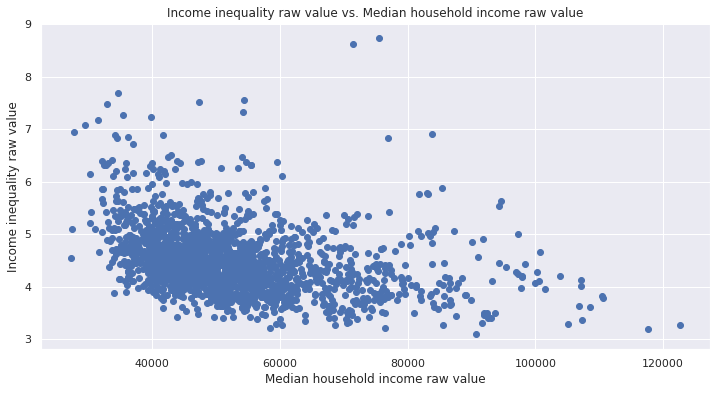

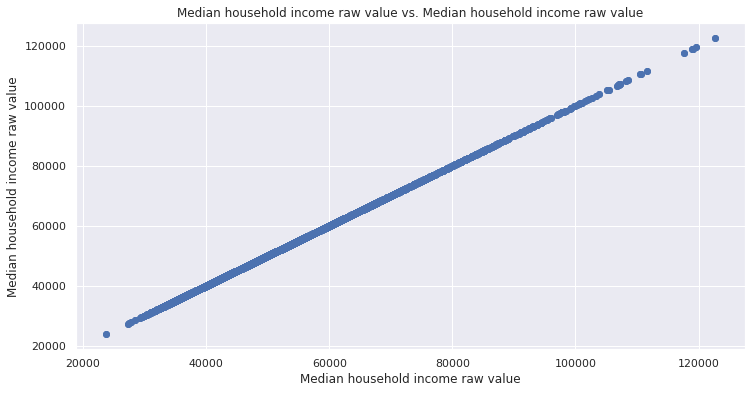

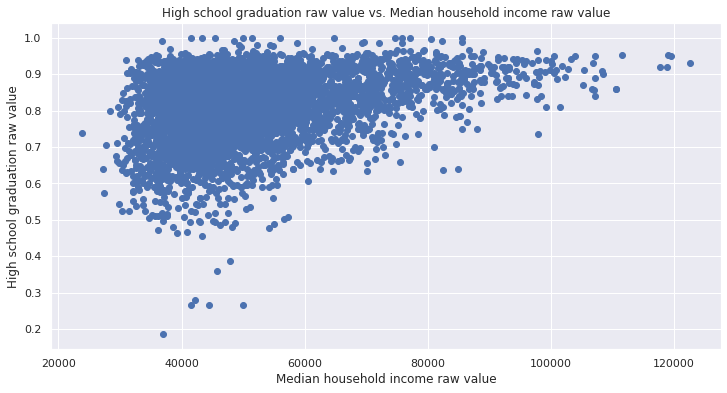

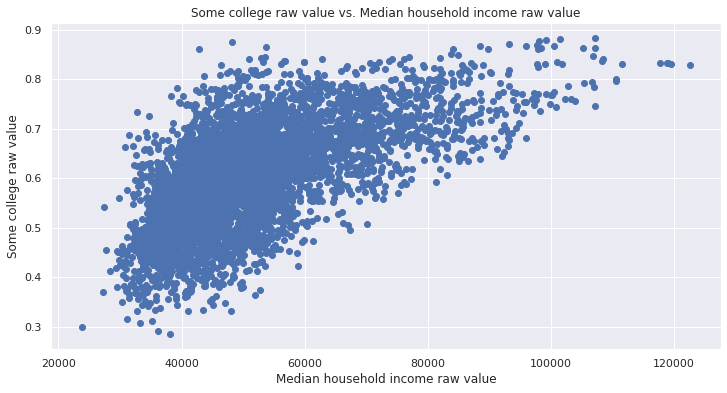

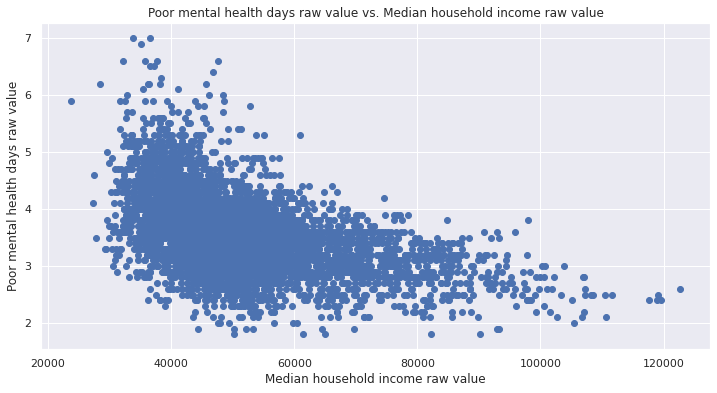

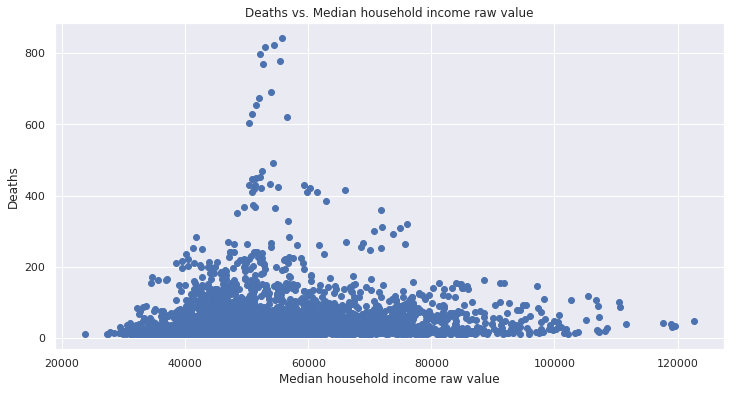

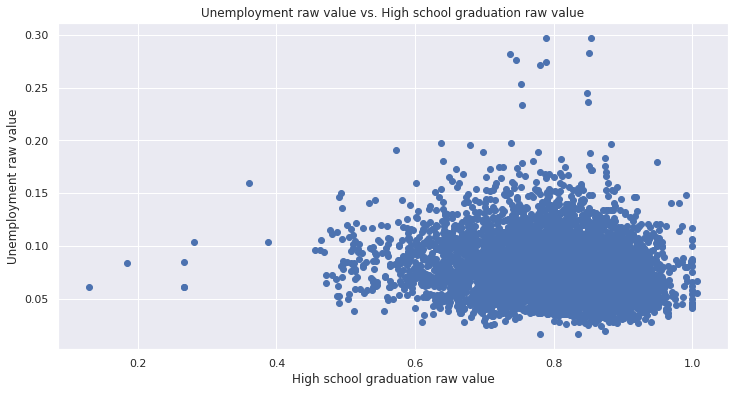

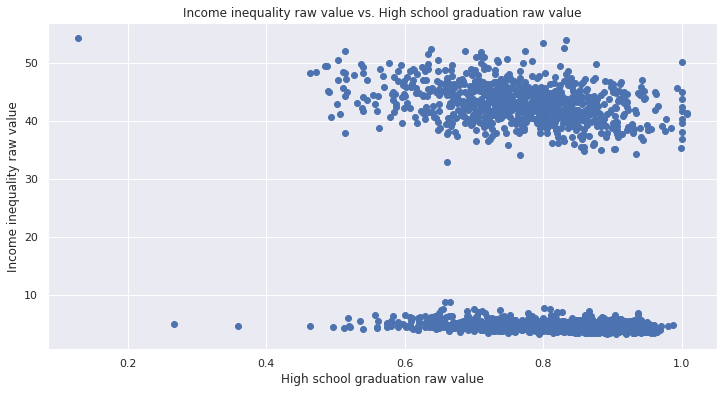

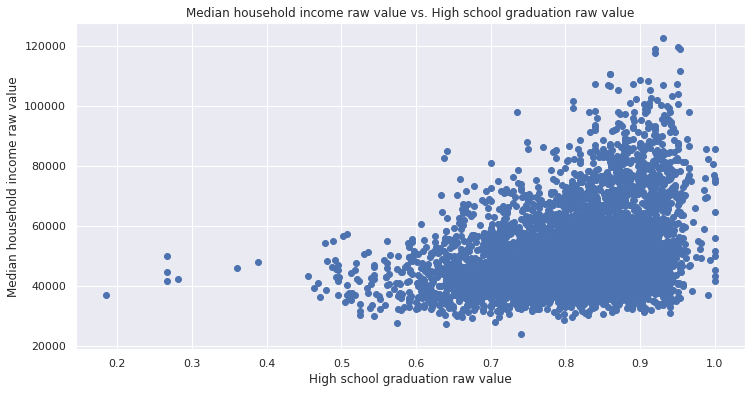

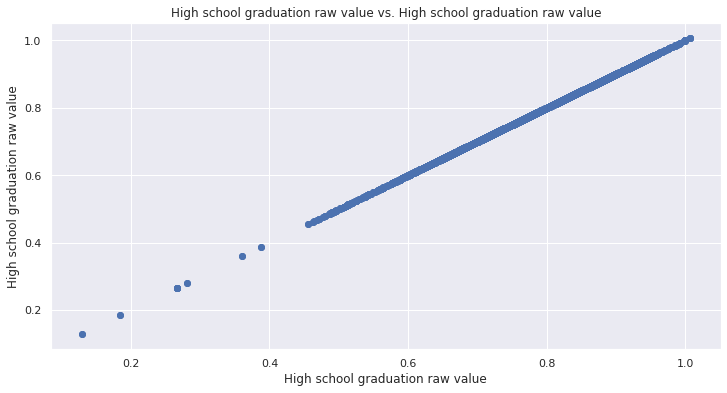

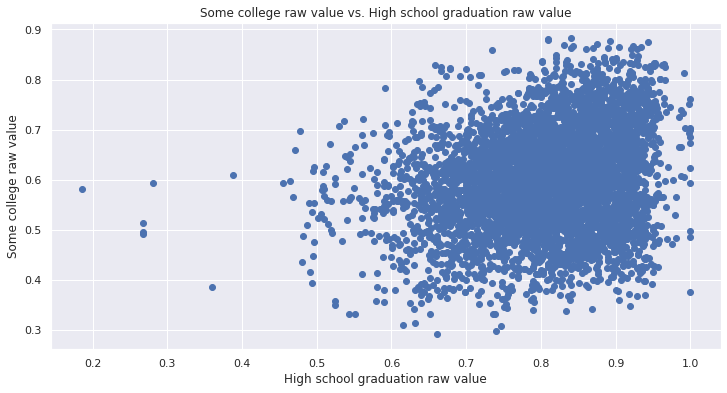

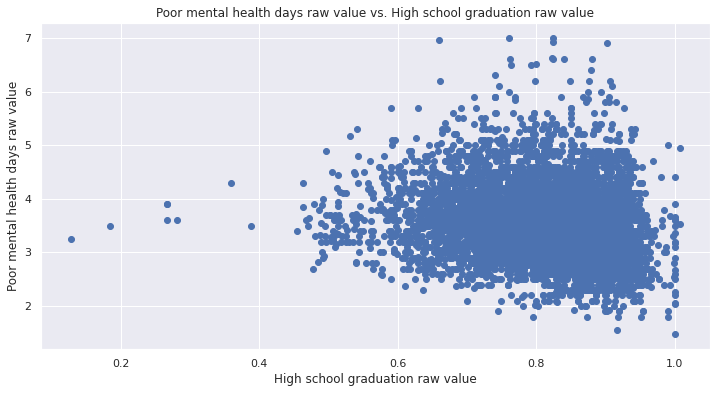

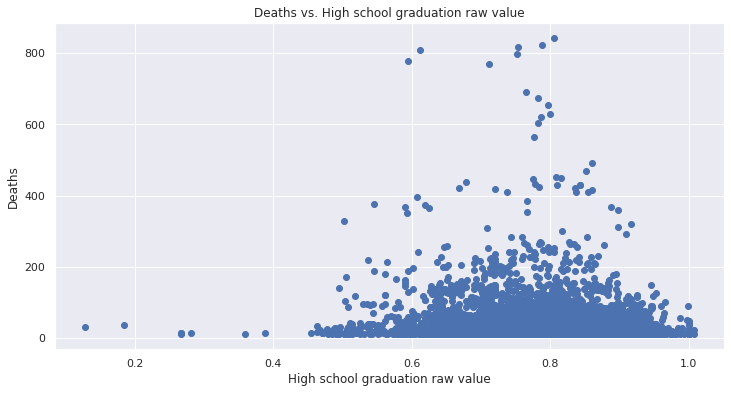

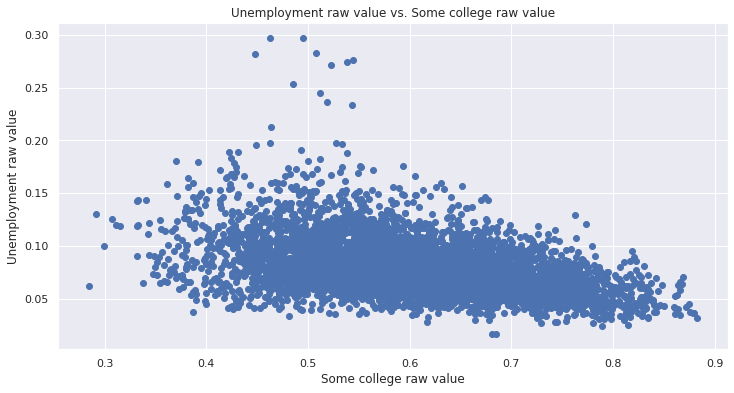

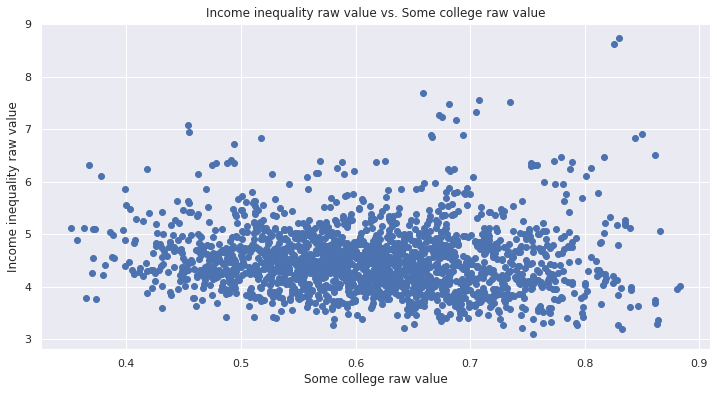

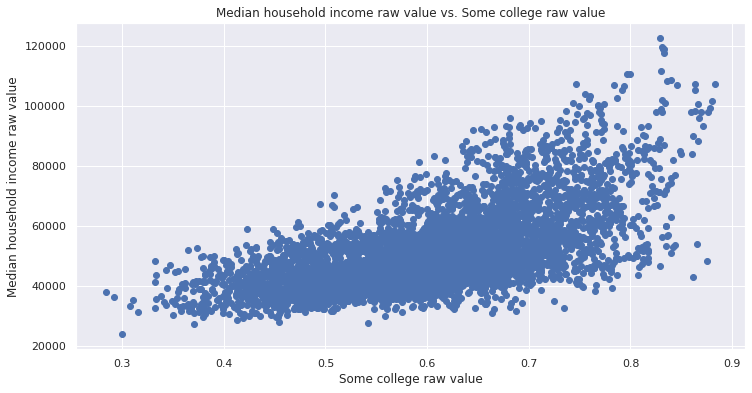

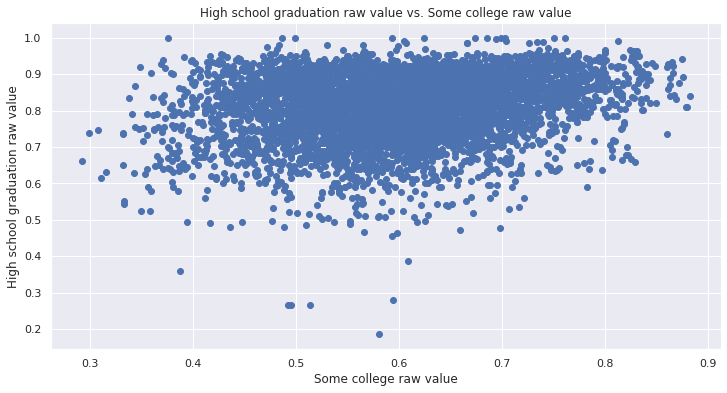

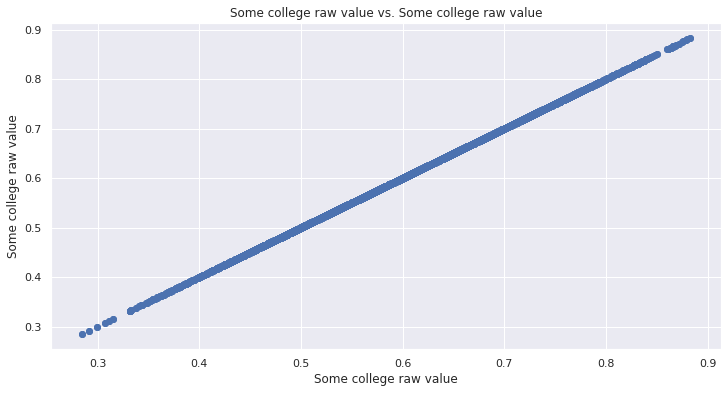

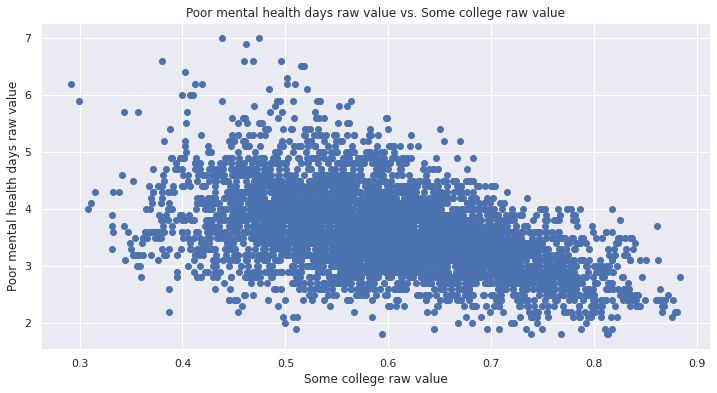

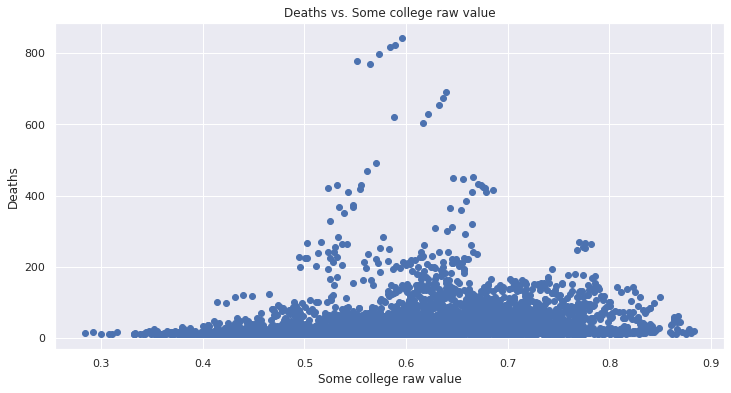

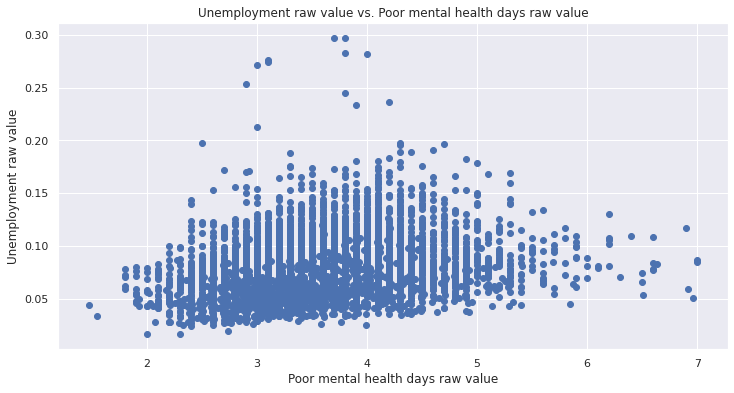

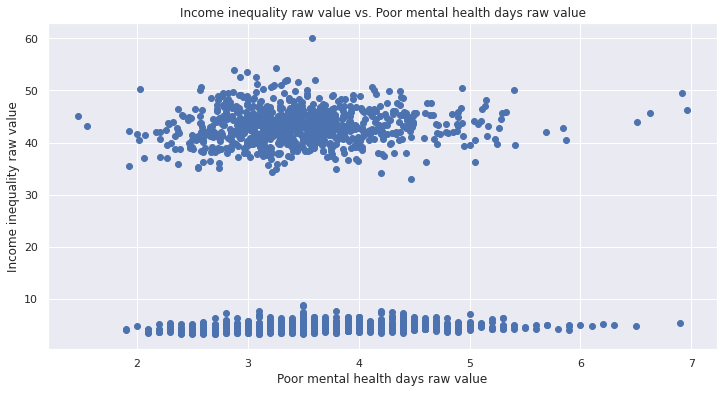

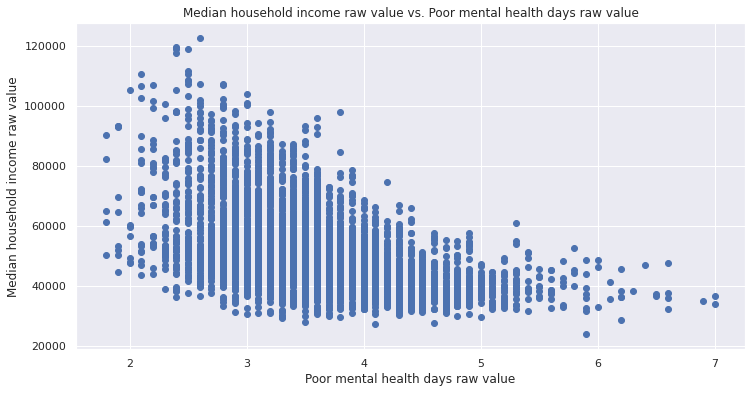

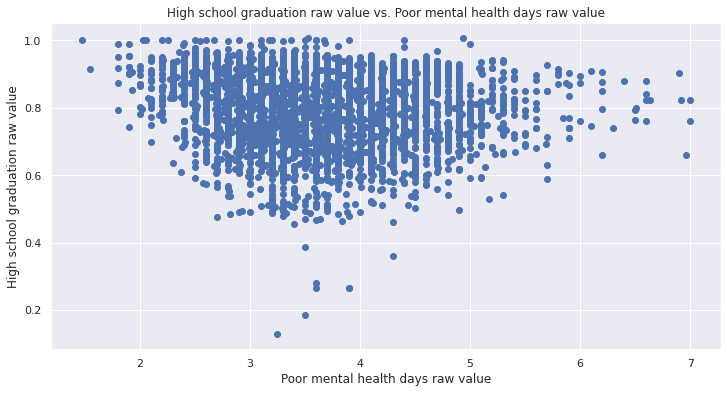

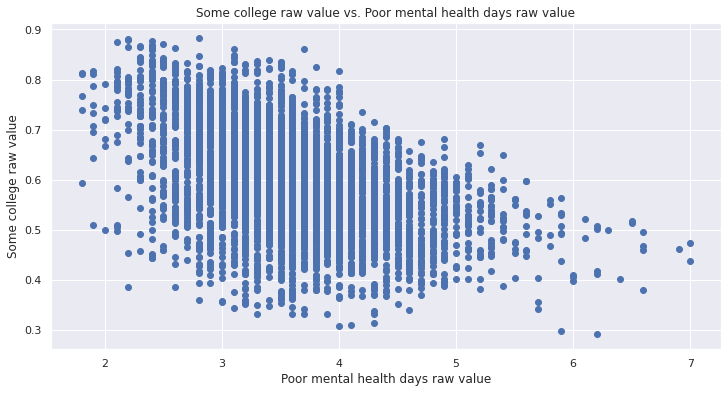

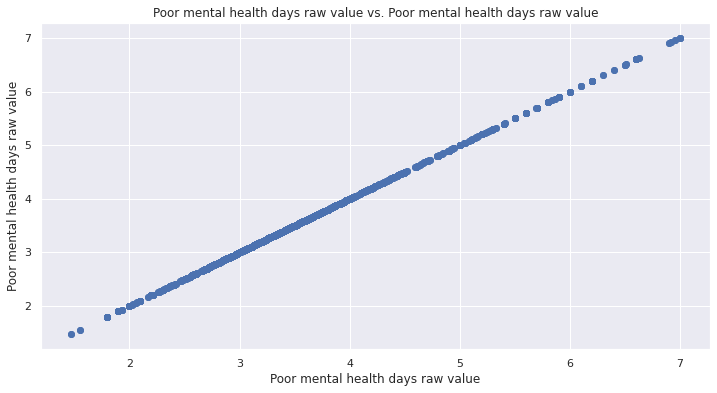

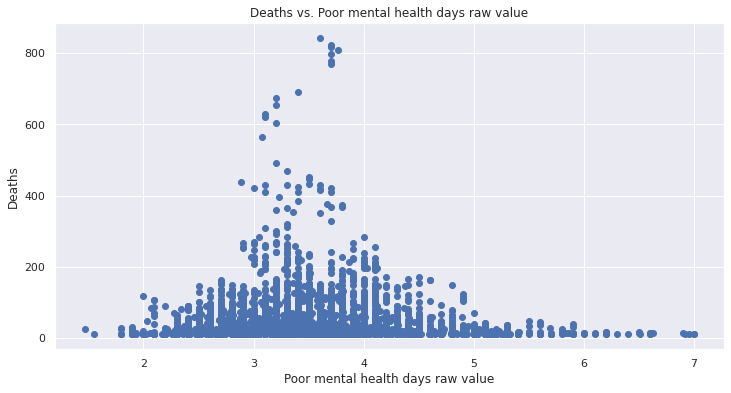

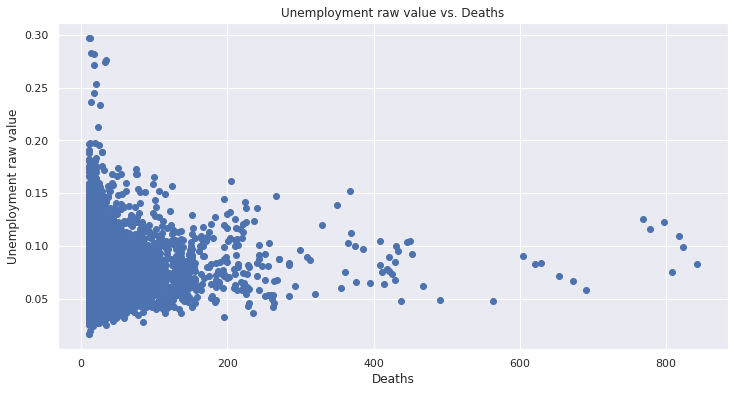

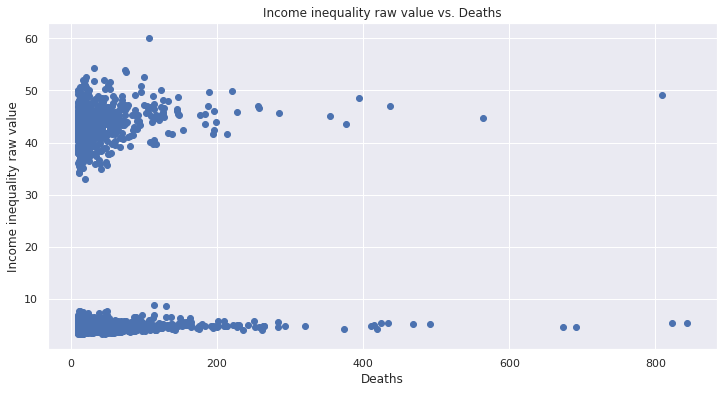

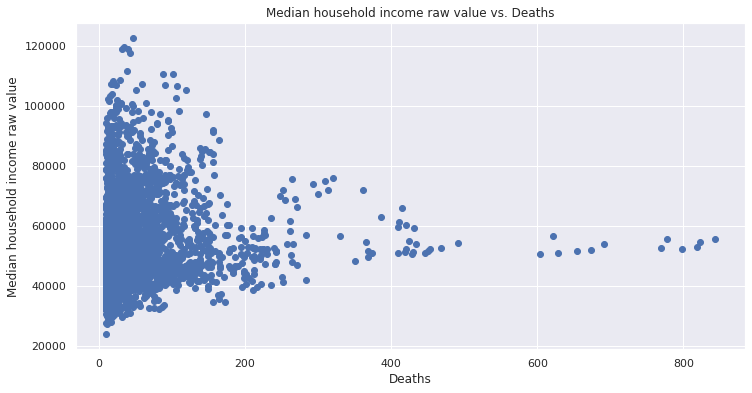

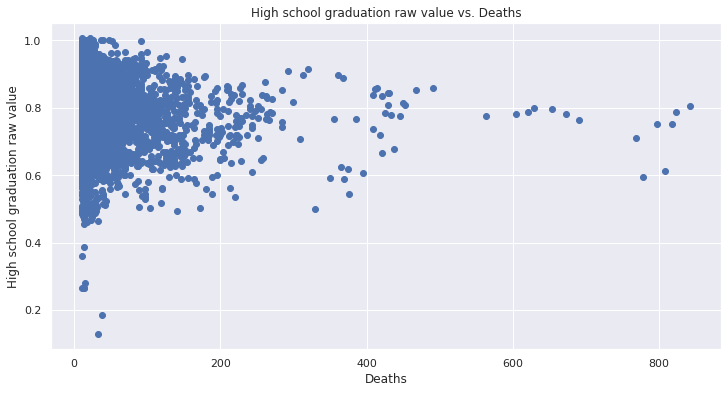

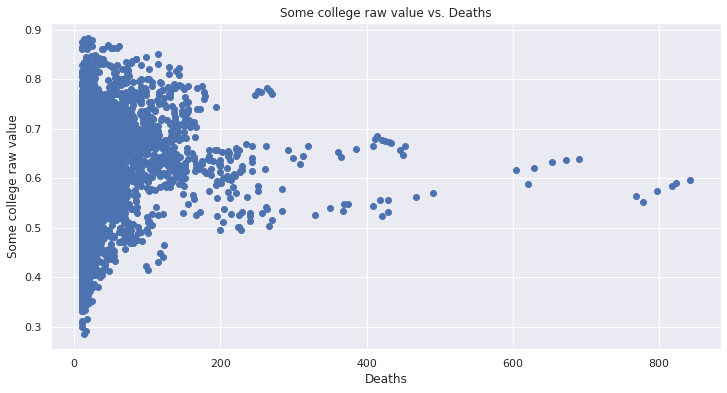

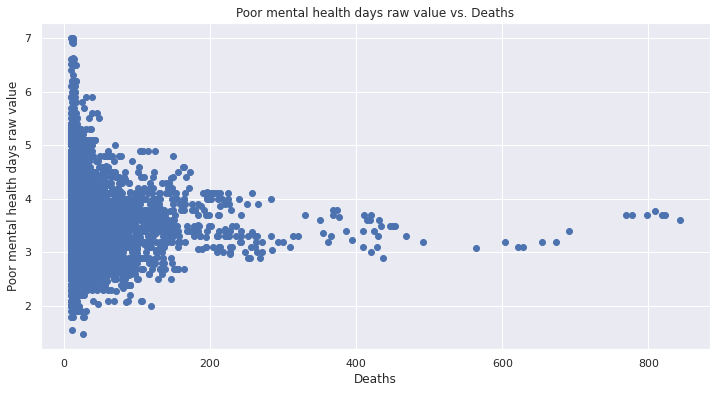

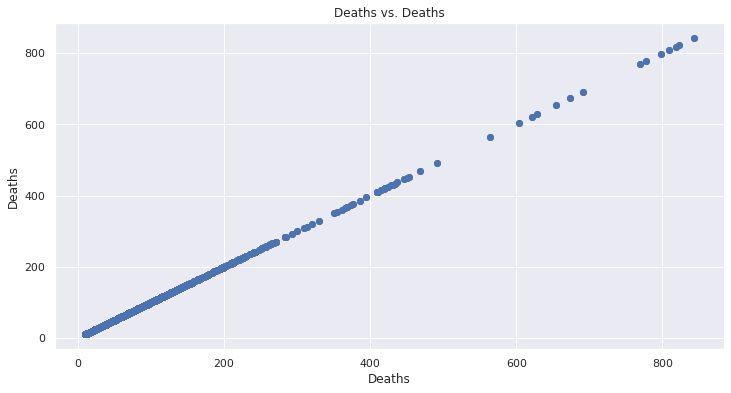

In [14]:
sns.set_theme()
for i, i_field in enumerate(independent_fields + dependent_fields):
    for j, d_field in enumerate(independent_fields + dependent_fields):
        plt.figure(i * len(dependent_fields) + j, figsize=(12, 6))
        field_df = filtered_df[[i_field, d_field]].dropna()
        x = field_df[i_field].astype(float).to_numpy()
        y = field_df[d_field].astype(float).to_numpy()
        plt.scatter(x, y)
        plt.title('{} vs. {}'.format(d_field, i_field))
        plt.ylabel(d_field)
        plt.xlabel(i_field)
        plt.show()

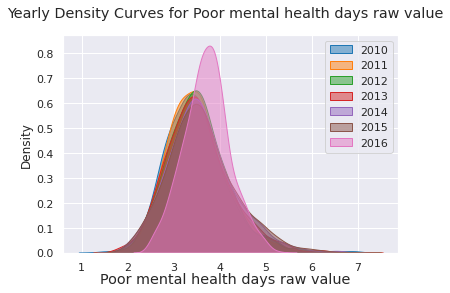

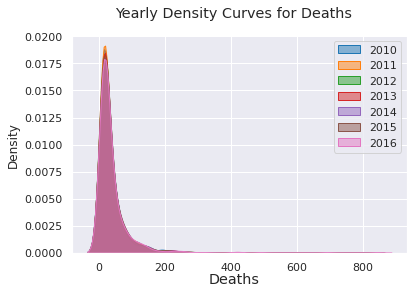

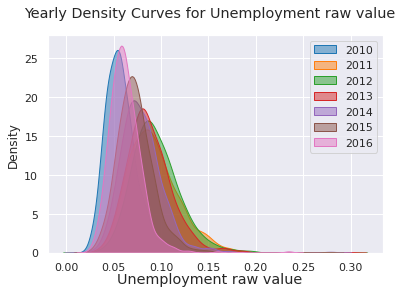

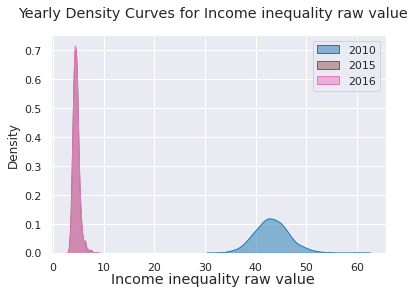

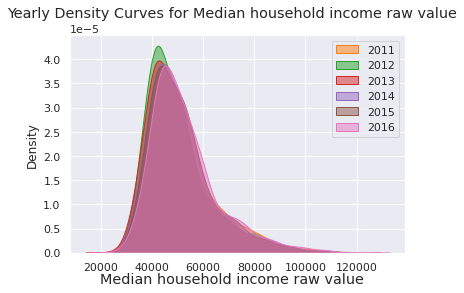

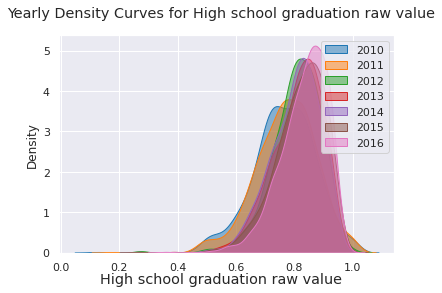

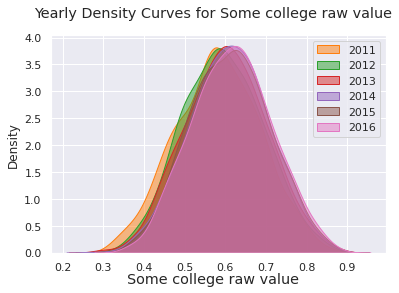

In [15]:
# Plot distributions on a single plot instead of on gridded subplots
years = sorted(filtered_df['Release Year'].unique()) # get unique year
colors = plt.get_cmap('tab10') # Tableau 10 color scheme
for i, field in enumerate(dependent_fields + independent_fields): # create density plots for all dependent fields
    fig, ax = plt.subplots() # create subplot grid
    field_df = filtered_df[['Release Year', field]].dropna().astype(float)
    for j in range(len(years)):
        values = field_df[field_df['Release Year'] == years[j]][field].to_numpy() # get values of dependent variable for current year
        sns.kdeplot(values, shade=True, label=years[j], alpha=0.5, ax=ax, color=colors(j), common_norm=False) # density plot using values and color scheme
        
    ax.legend()
    fig.suptitle('Yearly Density Curves for {}'.format(field))
    fig.supxlabel(field)
    plt.show()